In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [170]:
warnings.filterwarnings('ignore') # 避免sklearn的一些警告

In [171]:
pf = pd.read_excel(r"E:\比赛相关\污染源\白酒行业参数一览表.xls", sheet_name='总表',encodig='utf8')

In [172]:
pf.head()

,单位详细名称,行业名称1,行业代码1,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,污染类别,原料名称,产品名称,...,污染治理设施实际运行参数二名称,污染治理设施实际运行参数二数值,污染治理设施实际运行参数三名称,污染治理设施实际运行参数三数值,污染物排放量,污染物排放量计量单位,K值计算结果,K值核算填报结果,是否有监测数据,监测法核算排放量（吨）
0,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000297,吨,1.0,1.0,/,NaN
1,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000015,吨,1.0,1.0,/,NaN
2,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000004,吨,1.0,1.0,/,NaN
3,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000001,吨,1.0,1.0,/,NaN
4,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废气,柴油,蒸汽/热水/其他,...,NaN,NaN,NaN,NaN,0.004330,吨,NaN,1.0,/,NaN


In [173]:
pf.shape

(14384, 36)

#  特征分析和提取

In [1]:
np.where(pf.isnull().sum()/pf.shape[0]<0.5 )[0]

NameError: name 'np' is not defined

In [175]:
object_col = ['污染类别','原料名称','产品名称', '工艺名称', '生产规模等级','污染物名称','污染物处理工艺名称']  # 需要做labelencoder的列
data = pf[['污染类别','原料名称','产品名称', '工艺名称', '生产规模等级','污染物名称','污染物处理工艺名称']]
for i in object_col:
    lbl = LabelEncoder()
    data[i] = lbl.fit_transform(data[i].astype(str))
    data[i] = data[i]
data.head()

,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称
0,1,11,2,6,1,1,11
1,1,11,2,6,1,4,11
2,1,11,2,6,1,6,11
3,1,11,2,6,1,5,11
4,0,6,10,7,4,7,0


In [176]:
pf['污染物去除效率']= pf['污染物去除效率'].apply(lambda x: float(x.split('%')[0])*0.01)

In [177]:
train  = pf[['工业总产值(当年价格)(千元)']].apply(lambda x: x*1000)
pf['用水量（万吨）'] = pf['用水量（万吨）'].apply(lambda x: 0 if x=='/' else x)
train['用水量（吨）'] = pf['用水量（万吨）'].apply(lambda x: x*10000)
pf['排水量（万吨）'] = pf['排水量（万吨）'].apply(lambda x: 0 if x=='/' else x)
train['排水量（吨）'] = pf['排水量（万吨）'].apply(lambda x: x*10000)
train['是否进入污水处理厂']= pf['是否进入污水处理厂'].map(lambda x: int(x!='/'))
train['原料/燃料用量'] = pf['原料/燃料用量'].apply(lambda x: 0 if np.isnan(x) else x)
train['污染物产污系数'] = pf['污染物产污系数'].apply(lambda x:float(x.split('*')[0]))
train['污染物产污系数中参数取值'] = pf['污染物产污系数中参数取值'].apply(lambda x: 0 if np.isnan(x) else x)
train['污染物去除效率'] = pf['污染物去除效率']
columns = ['工业总产值(当年价格)(千元)', '用水量（万吨）','排水量（万吨）', '是否进入污水处理厂', '原料/燃料用量','污染物产生量','污染物去除效率']
train.head()

,工业总产值(当年价格)(千元),用水量（吨）,排水量（吨）,是否进入污水处理厂,原料/燃料用量,污染物产污系数,污染物产污系数中参数取值,污染物去除效率
0,20000.0,70.0,63.0,1,0.000,14232.370,1.0,0.9791
1,20000.0,70.0,63.0,1,0.000,143.591,1.0,0.8957
2,20000.0,70.0,63.0,1,0.000,40.061,1.0,0.8988
3,20000.0,70.0,63.0,1,0.000,27.716,1.0,0.9737
4,20000.0,70.0,63.0,1,1.429,3.030,0.0,0.0000


In [178]:
train = pd.concat([train,data],axis=1)

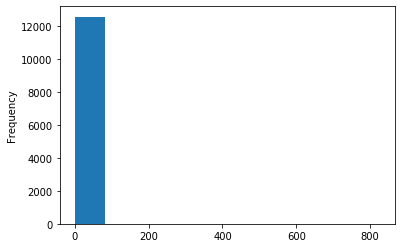

In [179]:
pf['污染物产生量'].plot.hist()

In [180]:
pf['污染物产生量'].describe()

count    12571.000000
mean         0.347139
std          7.893054
min          0.000000
25%          0.000822
50%          0.013251
75%          0.096984
max        825.086719
Name: 污染物产生量, dtype: float64

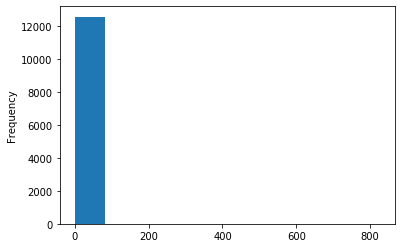

In [181]:
pf['污染物产生量'].plot.hist()

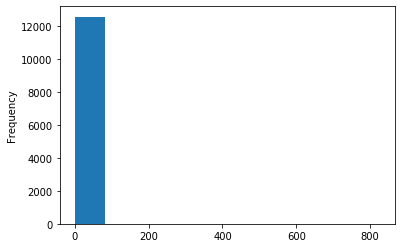

In [182]:
min_max_scaler = preprocessing.MinMaxScaler()
# pf['污染物产生量'] = pf['污染物产生量'].apply(lambda x: x*1000) # 单位化为克
# pf['污染物产生量'] = np.log(pf['污染物产生量'] + 1) 
# pf['污染物产生量'] = ((pf['污染物产生量'] - np.min(pf['污染物产生量'])) / (np.max(pf['污染物产生量']) - np.min(pf['污染物产生量'])))
pf['污染物产生量'].plot.hist()

In [184]:
train['污染物产生量'] = pf['污染物产生量']

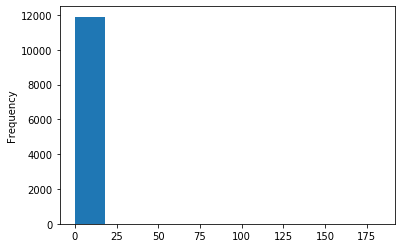

In [185]:
pf['污染物排放量'].plot.hist()

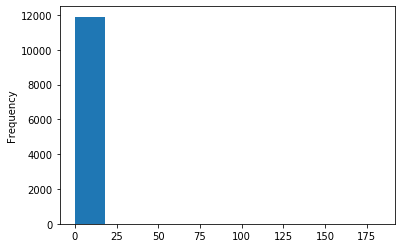

In [186]:
min_max_scaler = preprocessing.MinMaxScaler()
# pf['污染物排放量'] = pf['污染物排放量'].apply(lambda x: x*1000)
# pf['污染物排放量'] = np.log(pf['污染物排放量'] + 1) 
# pf['污染物排放量'] = ((pf['污染物排放量'] - np.min(pf['污染物排放量'])) / (np.max(pf['污染物排放量']) - np.min(pf['污染物排放量'])))
pf['污染物排放量'].plot.hist()

In [187]:
train['污染物排放量'] = pf['污染物排放量']
train.head()

,工业总产值(当年价格)(千元),用水量（吨）,排水量（吨）,是否进入污水处理厂,原料/燃料用量,污染物产污系数,污染物产污系数中参数取值,污染物去除效率,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称,污染物产生量,污染物排放量
0,20000.0,70.0,63.0,1,0.000,14232.370,1.0,0.9791,1,11,2,6,1,1,11,0.014232,0.000297
1,20000.0,70.0,63.0,1,0.000,143.591,1.0,0.8957,1,11,2,6,1,4,11,0.000144,0.000015
2,20000.0,70.0,63.0,1,0.000,40.061,1.0,0.8988,1,11,2,6,1,6,11,0.000040,0.000004
3,20000.0,70.0,63.0,1,0.000,27.716,1.0,0.9737,1,11,2,6,1,5,11,0.000028,0.000001
4,20000.0,70.0,63.0,1,1.429,3.030,0.0,0.0000,0,6,10,7,4,7,0,0.004330,0.004330


# 样本外点检测

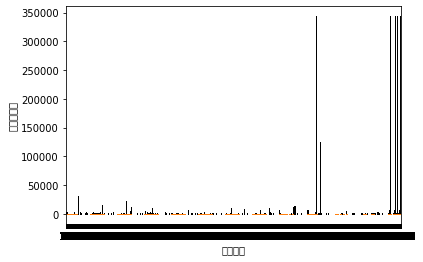

In [225]:

#绘制箱线图
plt.boxplot(train[['工业总产值(当年价格)(千元)', '原料/燃料用量', '污染物排放量']])
plt.xlabel("特征索引")
plt.ylabel("四分位间距")
plt.show()

# 信息熵

In [13]:
from math import log
 
def calcShannonEnt(dataSet):
    numEntries = len(dataSet) # 样本数
    labelCounts = {} # 该数据集每个类别的频数
    for featVec in dataSet:  # 对每一行样本
        currentLabel = featVec[-1] # 该样本的标签
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1 
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries # 计算p(xi)
        shannonEnt -= prob * log(prob, 2)  # log base 2
    return shannonEnt

print(calcShannonEnt(pf))

0.030057322720309997


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019674EBFEB8>,
      dtype=object)

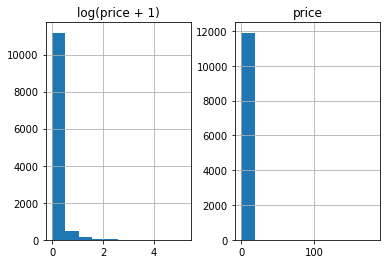

In [14]:
%matplotlib inline
emission = pd.DataFrame({"price":train["污染物排放量"], "log(price + 1)":np.log1p(train["污染物排放量"])})
emission.hist()

In [15]:
train['工业总产值(当年价格)(千元)'].dtypes


dtype('float64')

In [16]:
train['用水量（万吨）'].dtypes

dtype('float64')

In [17]:
train['排水量（万吨）'].dtypes

dtype('float64')

In [18]:
train['是否进入污水处理厂'].dtypes

dtype('int64')

In [19]:
train['原料/燃料用量'].dtypes

dtype('float64')

In [20]:
pf['污染物产生量'].isnull().sum()

1813

In [21]:
import matplotlib.pyplot as plt

In [22]:
X = np.array(train)[:,0:-1]
y = np.array(train)[:, -1]

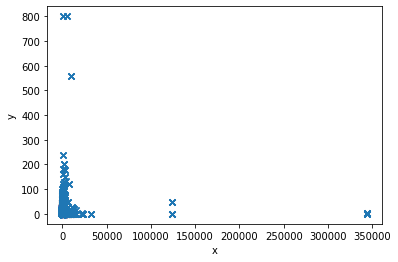

In [23]:
plt.scatter(X, y, marker='x')
# 绘制x轴和y轴坐标
plt.xlabel("x")
plt.ylabel("y")

# 显示图形

plt.show()

# 模型

In [188]:
train_end = train[~train['污染物排放量'].isnull()].reset_index(drop=True)
train_end.shape

(11911, 17)

In [189]:
test_end = train[train['污染物排放量'].isnull()].reset_index(drop=True)
test_end.shape

(2473, 17)

In [190]:
train_end.head()

,工业总产值(当年价格)(千元),用水量（吨）,排水量（吨）,是否进入污水处理厂,原料/燃料用量,污染物产污系数,污染物产污系数中参数取值,污染物去除效率,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称,污染物产生量,污染物排放量
0,20000.0,70.0,63.0,1,0.000,14232.370,1.0,0.9791,1,11,2,6,1,1,11,0.014232,0.000297
1,20000.0,70.0,63.0,1,0.000,143.591,1.0,0.8957,1,11,2,6,1,4,11,0.000144,0.000015
2,20000.0,70.0,63.0,1,0.000,40.061,1.0,0.8988,1,11,2,6,1,6,11,0.000040,0.000004
3,20000.0,70.0,63.0,1,0.000,27.716,1.0,0.9737,1,11,2,6,1,5,11,0.000028,0.000001
4,20000.0,70.0,63.0,1,1.429,3.030,0.0,0.0000,0,6,10,7,4,7,0,0.004330,0.004330


In [191]:
tr_index = ~train['污染物排放量'].isnull()
train_end = train_end[tr_index].reset_index(drop=True)
y=train_end['污染物排放量'].reset_index(drop=True)
test_end = test_end[~tr_index].reset_index(drop=True)

In [192]:
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score

In [193]:
def lgb_roc_auc_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) 
    return 'f1', roc_auc_score(y_true, y_hat), True

In [194]:
lgb_paras = {'objective': 'regression',
             'learning_rate': 0.1 ,
             'max_depth': 6 ,
             'feature_fraction': 0.8, 
             'bagging_fraction' : 0.8,
             'num_threads':-1}
feature = ['工业总产值(当年价格)(千元)','用水量（吨）','排水量（吨）','是否进入污水处理厂','原料/燃料用量','污染物产生量','污染物去除效率'
          ,'污染类别','原料名称','产品名称','工艺名称','生产规模等级','污染物名称','污染物处理工艺名称']

In [195]:
fi = []
cv_score = []
test_pred = np.zeros((test_end.shape[0],))
skf = KFold(n_splits=5, random_state=2019, shuffle=True)

In [66]:
for index, (train_index, test_index) in enumerate(skf.split(train_end, y)):
    print(index)
    train_x, test_x, train_y, test_y = train_end.iloc[train_index],train_end.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lgb_model = lgb.train(lgb_paras,
                          train_set = lgb.Dataset(train_x[feature], train_y),
                          valid_sets=[lgb.Dataset(test_x[feature],test_y)],
                          
                          num_boost_round=800 ,
                          feval=lgb_roc_auc_score,
                          verbose_eval=50,
                          categorical_feature = object_col
                          )

    

    y_val = lgb_model.predict(test_x[feature])
    
    print( roc_auc_score( test_y , np.round( y_val) ) )
    
    
    cv_score.append(roc_auc_score(test_y,np.round(y_val)))
    
    print(cv_score[index])
    
    test_pred += lgb_model.predict(test[feature]) / 5

0


ValueError: continuous format is not supported

In [59]:
X_train,X_test,y_train,y_test = train_test_split(train_end.iloc[:,:-1],train_end.iloc[:,-1],test_size=0.3)

In [148]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练...')
# 训练
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('开始预测...')
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
#交叉验证

# 评估
print('预估结果的rmse为:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

开始训练...
[1]	valid_0's auc: 0.921173	valid_0's l2: 4.6491
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.926199	valid_0's l2: 4.2023
[3]	valid_0's auc: 0.926199	valid_0's l2: 3.79932
[4]	valid_0's auc: 0.932372	valid_0's l2: 3.43539
[5]	valid_0's auc: 0.9327	valid_0's l2: 3.10705
[6]	valid_0's auc: 0.9327	valid_0's l2: 2.80998
[7]	valid_0's auc: 0.9327	valid_0's l2: 2.54187
[8]	valid_0's auc: 0.934994	valid_0's l2: 2.29974
[9]	valid_0's auc: 0.935923	valid_0's l2: 2.08175
[10]	valid_0's auc: 0.935923	valid_0's l2: 1.88419
[11]	valid_0's auc: 0.935923	valid_0's l2: 1.70625
[12]	valid_0's auc: 0.935923	valid_0's l2: 1.54569
[13]	valid_0's auc: 0.939747	valid_0's l2: 1.41717
[14]	valid_0's auc: 0.93849	valid_0's l2: 1.28527
[15]	valid_0's auc: 0.93849	valid_0's l2: 1.16582
[16]	valid_0's auc: 0.93849	valid_0's l2: 1.05907
[17]	valid_0's auc: 0.945155	valid_0's l2: 0.961549
[18]	valid_0's auc: 0.943844	valid_0's l2: 0.873474
[19]	valid_0's auc: 0.946793	va

In [150]:
pd.DataFrame({"预测值":y_pred,"实际值":y_test}).head()

,预测值,实际值
6053,2.660723,2.673459
8034,1.160255,0.262364
1959,1.080405,0.080658
2181,3.376086,3.798698
7678,4.177306,5.040841


# 多项式回归

[-0.60323462] [-0.60323462  0.36389201]
[2.08183476] [[1.05006034 0.47989281]]


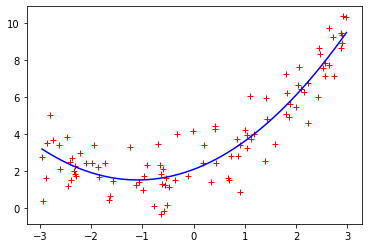

In [151]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures( degree=2, include_bias=False )
X_poly = poly_features.fit_transform( X )
print( X[0], X_poly[0] )

lin_reg = LinearRegression()
lin_reg.fit( X_poly, y )
print( lin_reg.intercept_, lin_reg.coef_ )

# min是找出矩阵最小值，argmin是找出矩阵最小值所在的index
X_pred = np.linspace( np.min(X), np.max(X), 50 )
# coef所对应的阶数是从1往n排的
y_poly_pred = lin_reg.coef_[0,1] * X_pred**2 + lin_reg.coef_[0,0] * X_pred + lin_reg.intercept_

plt.plot( X, y, 'r+' )
plt.plot( X_pred, y_poly_pred, 'b-' )
plt.show()

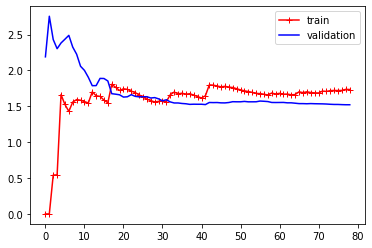

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2 )
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit( X_train[:m], y_train[:m] )
        y_train_predict = model.predict( X_train[:m] )
        y_val_predict = model.predict( X_val )
        train_errors.append( mean_squared_error( y_train_predict, y_train[:m] ) )
        val_errors.append( mean_squared_error( y_val_predict, y_val ) )
    plt.plot( np.sqrt(train_errors), "r-+", label="train" )
    plt.plot( np.sqrt(val_errors), "b-", label="validation" )
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curves( lin_reg, X, y )
plt.show()

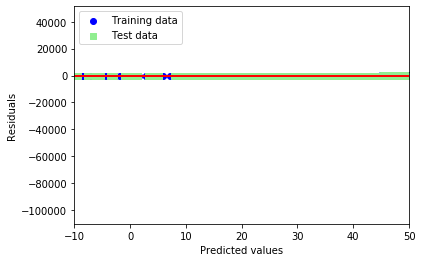

MSE train: 396156.158, test: 4631398.923
PolynomialFeatures MSE train: 3376.297, test: 41052196.795
R^2 train: 0.488, test: 0.730
PolynomialFeatures R^2 train: 0.996, test: -1.396


In [152]:
from sklearn.preprocessing import PolynomialFeatures
# 线性模型训练
X_train,X_test,y_train,y_test = train_test_split(train_end.iloc[:,:-1],train_end.iloc[:,-1],test_size=0.3)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
 
# 多项式回归模型构造及训练
spr = LinearRegression()
quadratic = PolynomialFeatures()
X_train_quad = quadratic.fit_transform(X_train)
spr.fit(X_train_quad, y_train)
y_train_pred_quad = spr.predict(X_train_quad)
y_test_pred_quad = spr.predict(quadratic.fit_transform(X_test))
 
 
# 残差评估方法
plt.scatter(y_train_pred, y_train_pred-y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred-y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, colors='red')
plt.xlim([-10, 50])
#plt.savefig('../result/residuals_metric.png')
plt.show()
 
# 均方误差评价指标
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred))
)
print('PolynomialFeatures MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred_quad),
    mean_squared_error(y_test, y_test_pred_quad))
)
 
# 决定系数评价指标
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred),
      r2_score(y_test, y_test_pred)))
print('PolynomialFeatures R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred_quad),
      r2_score(y_test, y_test_pred_quad)))
 


In [153]:
pd.DataFrame({'预测值':y_train_pred_quad,'实际值':y_train}).head(50)

,预测值,实际值
10100,8.214282,0.098
10084,8.830568,0.614
4863,0.654279,0.323
1529,12.990806,7.149
8001,2.130660,0.205
2209,-2.570758,0.263
2600,30.922326,34.869
5831,11.847589,0.097
3588,9.838811,0.491
5105,0.570240,0.359


In [92]:
kf = KFold(n_splits=5, random_state=2019, shuffle=True)
score_list=[]
X = train_end.iloc[:,:-1].reset_index(drop=True)
y = train_end.iloc[:,-1].reset_index(drop=True)
for train_index,test_index in kf.split(X):
    train_X = X.iloc[train_index,:]
    test_X = X.iloc[test_index,:]
    train_y = y.iloc[train_index,:]
    test_y = y.iloc[test_index,:]
    spr = LinearRegression()
    quadratic = PolynomialFeatures()
    train_X_quad = quadratic.fit_transform(train_X)
    spr.fit(train_X_quad, train_y)
    train_y_pred_quad = spr.predict(train_X_quad)
    test_y_pred_quad = spr.predict(quadratic.fit_transform(test_X))
    score = linear_model.score(test_X,test_y)
    score_list.append(score)
print(score_list)

IndexingError: Too many indexers